# Latency analysis

In [1]:
recording_files = [
    "2020-07-16T16-40-18",
    "2020-07-17T09-01-20",
    "2020-07-17T13-52-03",
    "2020-07-17T15-24-15",
]

axislim_margin = 0.03

In [2]:
import os

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

from ptinsight.common.latency import calculate_latencies
from ptinsight.common.plotting import plot_init, plot_format, plot_save, add_relative_time

In [3]:
def select_job(data, job):
    """Get all rows for a specific job"""
    return data[data["job"] == job]

## Preprocessing

In [4]:
plot_init()

datas = {}
jobs = set()

# did = data id since id is a builtin
for did in sorted(recording_files):
    data = pd.read_csv(f"recordings/{did}.csv")
    add_relative_time(data, "ingress_ingestion_timestamp")
    calculate_latencies(data)
    
    jobs.update(data["job"])
    
    datas[did] = {
        "data": data,
    }
    
jobs = sorted(jobs)
n_jobs = len(jobs)
n_data = len(recording_files)

latency_cols = [col for col in datas[did]["data"] if col.startswith("latency")]
latency_cols_no_e2e = [col for col in latency_cols if not "end_to_end" in col]

max_latency = max([info["data"][latency_cols_no_e2e].max().max() for info in datas.values()])
max_t = max([info["data"]["t"].max() for info in datas.values()])

## Descriptive statistics of latencies per job

In [5]:
for did, info in datas.items():
    display(Markdown(f"### ID: {did}"))
    for job in jobs:
        display(Markdown(f"#### Job: {job}"))
        display(select_job(info["data"], job)[latency_cols].describe())

### ID: 2020-07-16T16-40-18

#### Job: delay-statistics

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,7200.000000,7200.000000,7200.000000,7200.000000
mean,5021.171667,29.260139,4856.086111,135.825417
std,1642.407051,48.322598,1663.534745,103.989358
min,1339.000000,2.000000,1190.000000,4.000000
25%,3709.750000,10.000000,3514.000000,61.000000
50%,5106.500000,16.000000,4859.000000,108.000000
75%,6285.250000,26.000000,6163.250000,174.000000
max,10265.000000,593.000000,10154.000000,782.000000


#### Job: emergency-stop-streaming

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,4461.000000,4461.000000,4461.000000,4461.000000
mean,6112.321901,32.960995,6051.680565,27.680341
std,5161.682099,49.210778,5157.029127,53.790447
min,1049.000000,3.000000,820.000000,1.000000
25%,2248.000000,11.000000,2201.000000,5.000000
50%,3141.000000,18.000000,3092.000000,10.000000
75%,9600.000000,32.000000,9498.000000,21.000000
max,29747.000000,518.000000,29695.000000,791.000000


#### Job: emergency-stop-table

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,7206.000000,7206.000000,7206.000000,7206.000000
mean,1828.327644,34.065640,1759.487649,34.774355
std,550.234742,50.583076,552.212599,68.060902
min,892.000000,3.000000,698.000000,1.000000
25%,1320.250000,12.000000,1265.000000,4.000000
50%,1682.000000,18.000000,1556.000000,9.000000
75%,2279.000000,33.000000,2231.000000,22.000000
max,4340.000000,518.000000,4323.000000,771.000000


#### Job: vehicle-count

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,10920.000000,10920.000000,10920.000000,10920.000000
mean,4410.799725,34.299542,4182.037363,194.462821
std,1483.361100,50.012111,1478.601127,100.052241
min,1234.000000,3.000000,1121.000000,4.000000
25%,3251.000000,12.000000,3046.000000,118.000000
50%,4485.500000,19.000000,4280.000000,187.000000
75%,5629.000000,33.000000,5395.000000,257.000000
max,8554.000000,559.000000,8183.000000,728.000000


### ID: 2020-07-17T09-01-20

#### Job: delay-statistics

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,15029.000000,15029.000000,15029.000000,15029.000000
mean,4794.939916,49.040256,4536.729523,209.170138
std,1603.971394,87.551752,1624.501685,131.976305
min,1208.000000,3.000000,956.000000,5.000000
25%,3450.000000,10.000000,3224.000000,111.000000
50%,4775.000000,17.000000,4427.000000,176.000000
75%,6095.000000,33.000000,5842.000000,289.000000
max,11179.000000,815.000000,11019.000000,763.000000


#### Job: emergency-stop-streaming

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,9454.000000,9454.000000,9454.000000,9454.000000
mean,1904.990374,46.125238,1810.868627,47.996509
std,727.006824,79.868268,734.379197,86.696539
min,1052.000000,3.000000,615.000000,2.000000
25%,1419.000000,12.000000,1329.000000,8.000000
50%,1774.000000,18.000000,1662.000000,15.000000
75%,2224.000000,33.000000,2163.750000,34.000000
max,20628.000000,794.000000,20606.000000,963.000000


#### Job: emergency-stop-table

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,9440.000000,9440.000000,9440.000000,9440.000000
mean,7923.289725,46.116843,7829.666208,47.506674
std,6752.089522,79.858115,6744.586566,87.630355
min,1122.000000,3.000000,719.000000,2.000000
25%,2297.000000,12.000000,2238.000000,7.000000
50%,5975.500000,18.000000,5872.000000,14.000000
75%,10814.250000,33.000000,10712.500000,33.000000
max,27589.000000,794.000000,27531.000000,894.000000


#### Job: vehicle-count

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,22519.000000,22519.000000,22519.000000,22519.000000
mean,4358.170789,50.814512,4081.791731,225.564545
std,1472.132146,86.793591,1462.639848,127.418846
min,1304.000000,3.000000,760.000000,5.000000
25%,3122.000000,12.000000,2845.000000,126.000000
50%,4413.000000,19.000000,4176.000000,205.000000
75%,5605.000000,36.000000,5353.000000,305.000000
max,8638.000000,816.000000,8369.000000,919.000000


### ID: 2020-07-17T13-52-03

#### Job: delay-statistics

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,5321.000000,5321.000000,5321.00000,5321.00000
mean,5119.315918,46.949258,4887.50498,184.86168
std,1622.558153,74.626693,1647.90541,134.54399
min,1372.000000,3.000000,1208.00000,4.00000
25%,3868.000000,13.000000,3567.00000,91.00000
50%,5209.000000,23.000000,4934.00000,151.00000
75%,6351.000000,43.000000,6176.00000,242.00000
max,9616.000000,678.000000,9458.00000,1220.00000


#### Job: emergency-stop-streaming

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,5322.000000,5322.000000,5322.000000,5322.000000
mean,1839.322811,48.893273,1745.320368,45.109169
std,533.100652,73.746111,539.564952,82.822659
min,1060.000000,4.000000,612.000000,2.000000
25%,1325.000000,14.000000,1252.000000,8.000000
50%,1785.500000,25.000000,1637.000000,15.000000
75%,2236.000000,45.750000,2177.000000,31.000000
max,4112.000000,639.000000,4093.000000,676.000000


#### Job: emergency-stop-table

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,139.000000,139.000000,139.000000,139.000000
mean,18692.410072,49.489209,18615.194245,27.726619
std,7093.471591,57.142000,7095.821107,28.192353
min,1636.000000,4.000000,1564.000000,3.000000
25%,13668.500000,16.000000,13527.500000,11.500000
50%,20445.000000,29.000000,20231.000000,20.000000
75%,23724.000000,68.000000,23674.500000,36.000000
max,29850.000000,348.000000,29778.000000,199.000000


#### Job: vehicle-count

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,8007.000000,8007.000000,8007.000000,8007.000000
mean,4492.590483,50.473835,4206.840889,235.275759
std,1477.918473,74.760347,1474.232804,114.309118
min,1400.000000,3.000000,954.000000,5.000000
25%,3336.500000,15.000000,3098.500000,153.000000
50%,4559.000000,26.000000,4279.000000,226.000000
75%,5691.000000,49.000000,5401.000000,306.000000
max,8653.000000,639.000000,8434.000000,774.000000


### ID: 2020-07-17T15-24-15

#### Job: delay-statistics

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,3136.000000,3136.000000,3136.000000,3136.000000
mean,5390.707589,32.262436,5234.344388,124.100765
std,1622.450511,72.228441,1636.901729,102.047964
min,1160.000000,3.000000,1106.000000,4.000000
25%,4218.750000,7.000000,4095.250000,59.000000
50%,5333.500000,11.000000,5195.500000,104.000000
75%,6500.250000,18.000000,6307.500000,145.000000
max,10375.000000,611.000000,10282.000000,715.000000


#### Job: emergency-stop-streaming

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,2252.000000,2252.000000,2252.000000,2252.000000
mean,2182.489787,29.743783,2119.464920,33.281083
std,1263.708291,61.847885,1263.941501,68.239547
min,1069.000000,3.000000,809.000000,2.000000
25%,1953.750000,9.000000,1846.750000,5.000000
50%,2178.500000,12.000000,2139.000000,11.000000
75%,2292.000000,20.000000,2240.000000,24.000000
max,27899.000000,573.000000,27878.000000,649.000000


#### Job: emergency-stop-table

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,2250.000000,2250.000000,2250.000000,2250.000000
mean,2361.166222,29.760444,2290.314222,41.091556
std,1271.573507,61.872737,1272.907234,82.547218
min,1101.000000,3.000000,797.000000,2.000000
25%,2118.250000,9.000000,2048.250000,5.000000
50%,2257.500000,12.000000,2206.000000,10.000000
75%,2414.750000,20.000000,2326.750000,26.000000
max,26375.000000,573.000000,26294.000000,681.000000


#### Job: vehicle-count

,latency_end_to_end,latency_ingest_to_processing,latency_processing,latency_processing_to_ui
count,4686.000000,4686.000000,4686.000000,4686.000000
mean,4628.682032,32.694622,4414.527102,181.460307
std,1487.751519,68.321176,1484.510873,100.148353
min,1434.000000,3.000000,1271.000000,9.000000
25%,3488.250000,9.000000,3288.500000,102.000000
50%,4668.000000,12.000000,4435.000000,172.000000
75%,5772.750000,20.000000,5554.750000,239.000000
max,8524.000000,573.000000,8300.000000,699.000000


In [6]:
for did, info in datas.items():
    print(f"ID: {did}")
    for job in jobs:
        if "emergency-stop" in job:
            print(f"{job}: n={select_job(info['data'], job)['t'].count()}")

ID: 2020-07-16T16-40-18
emergency-stop-streaming: n=4461
emergency-stop-table: n=7206
ID: 2020-07-17T09-01-20
emergency-stop-streaming: n=9454
emergency-stop-table: n=9440
ID: 2020-07-17T13-52-03
emergency-stop-streaming: n=5322
emergency-stop-table: n=139
ID: 2020-07-17T15-24-15
emergency-stop-streaming: n=2252
emergency-stop-table: n=2250


## Latency distribution per job

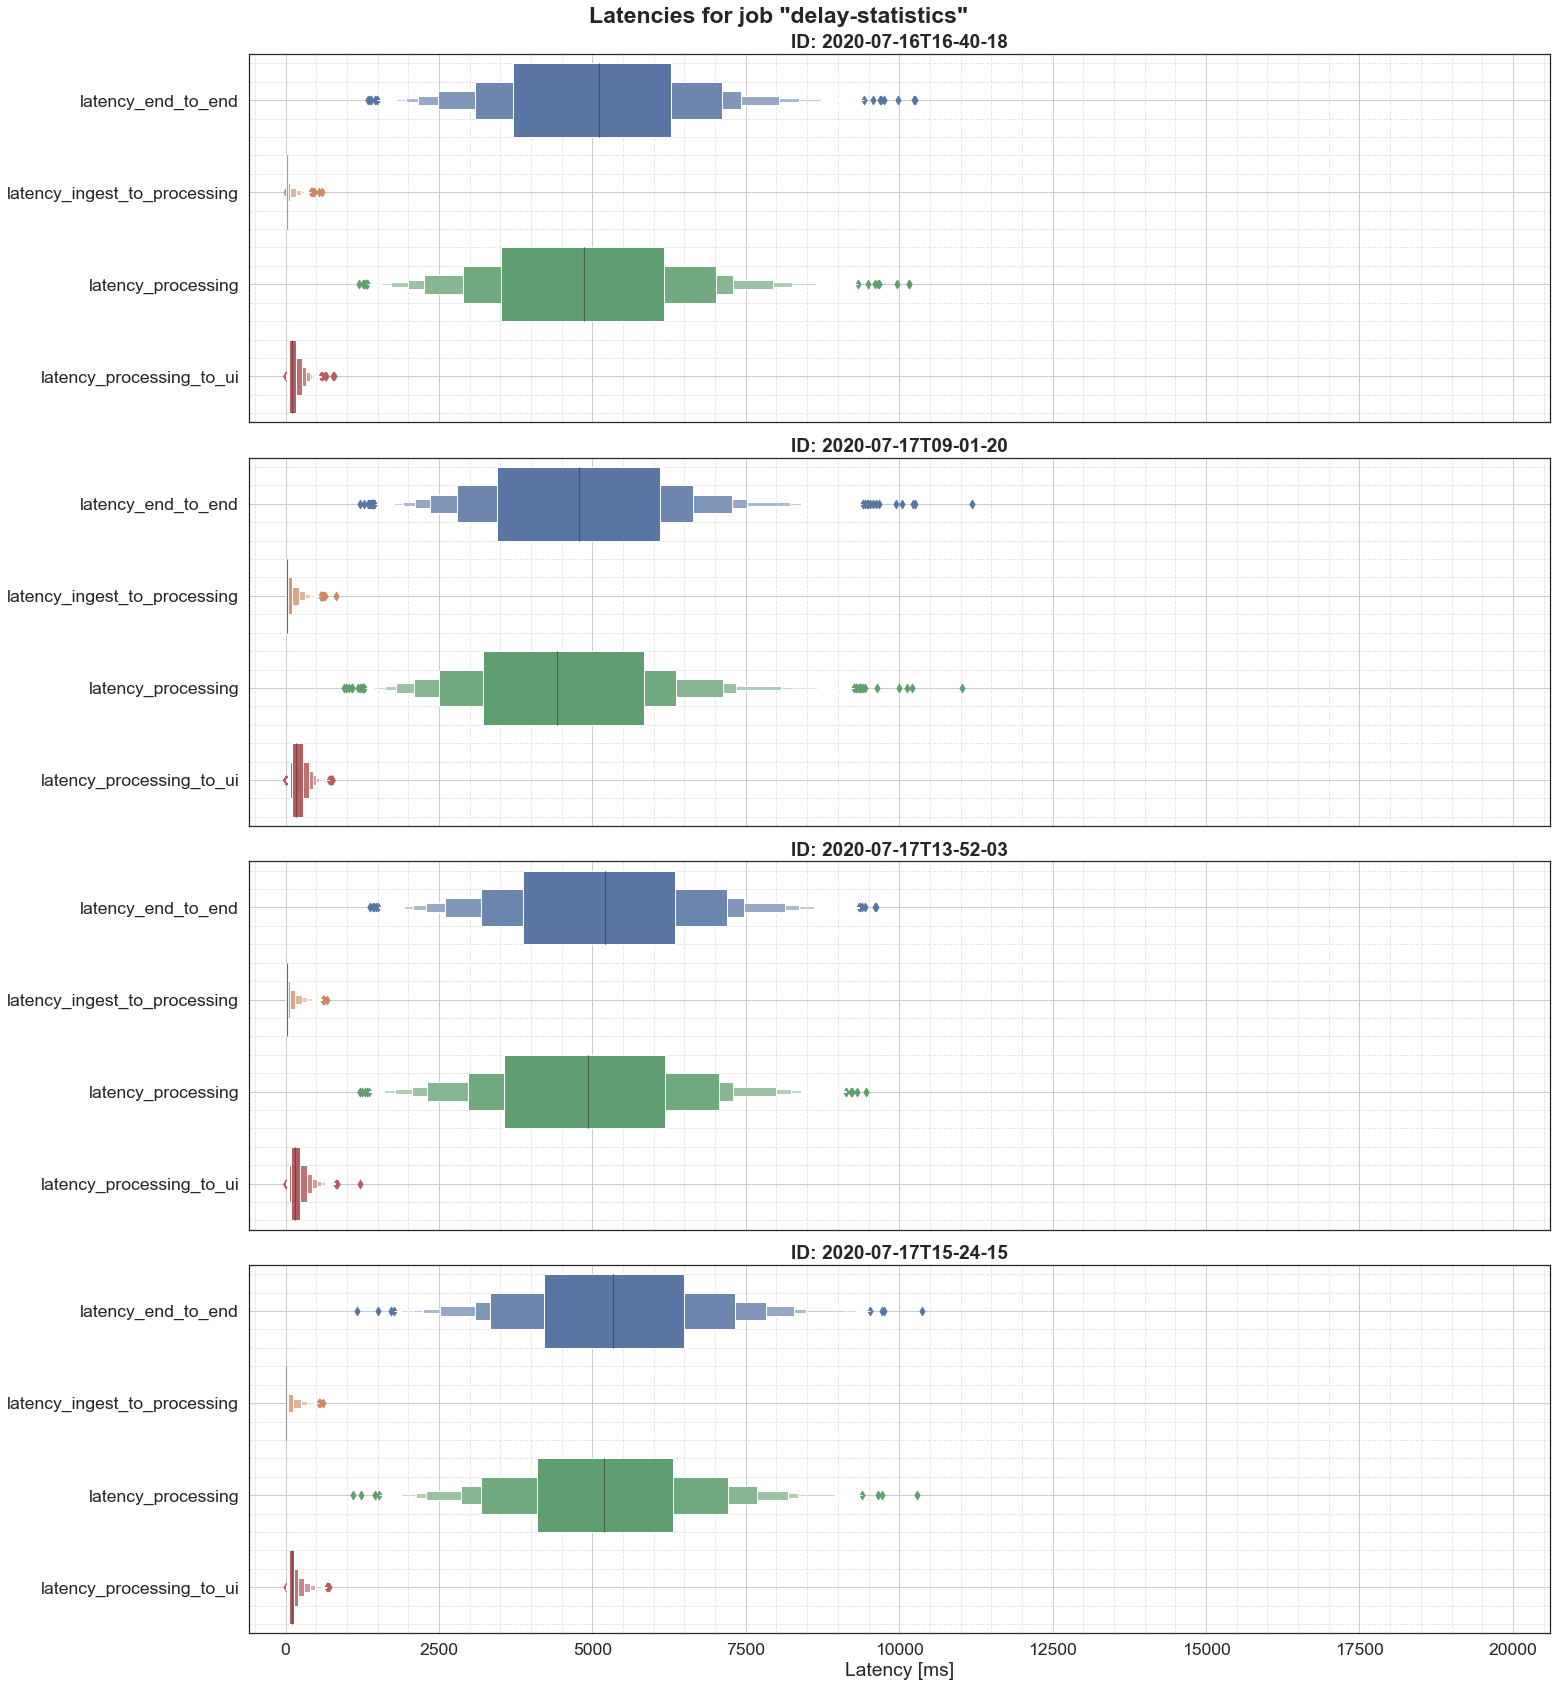

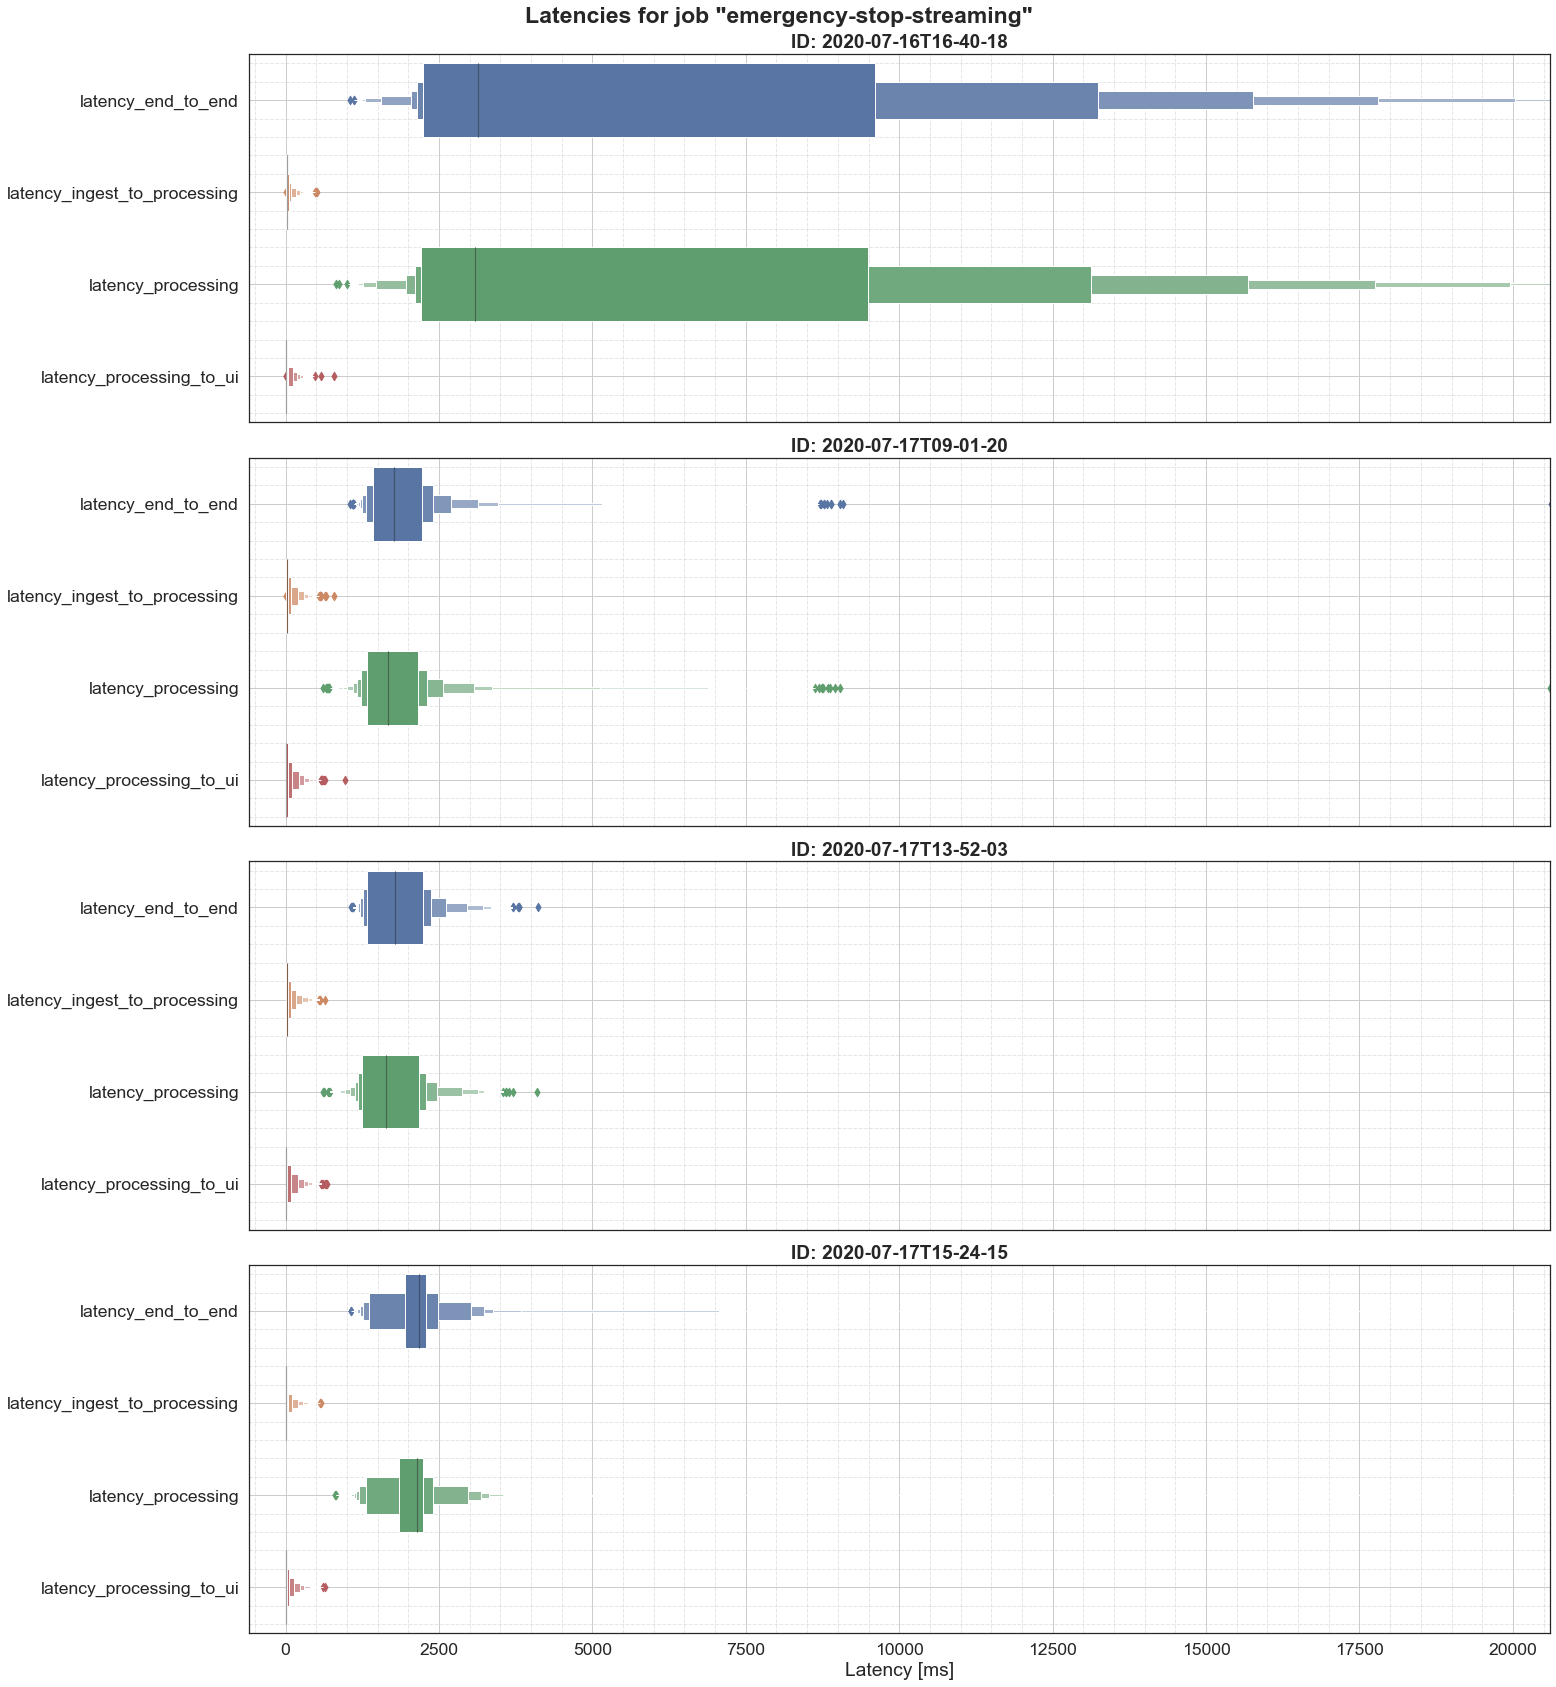

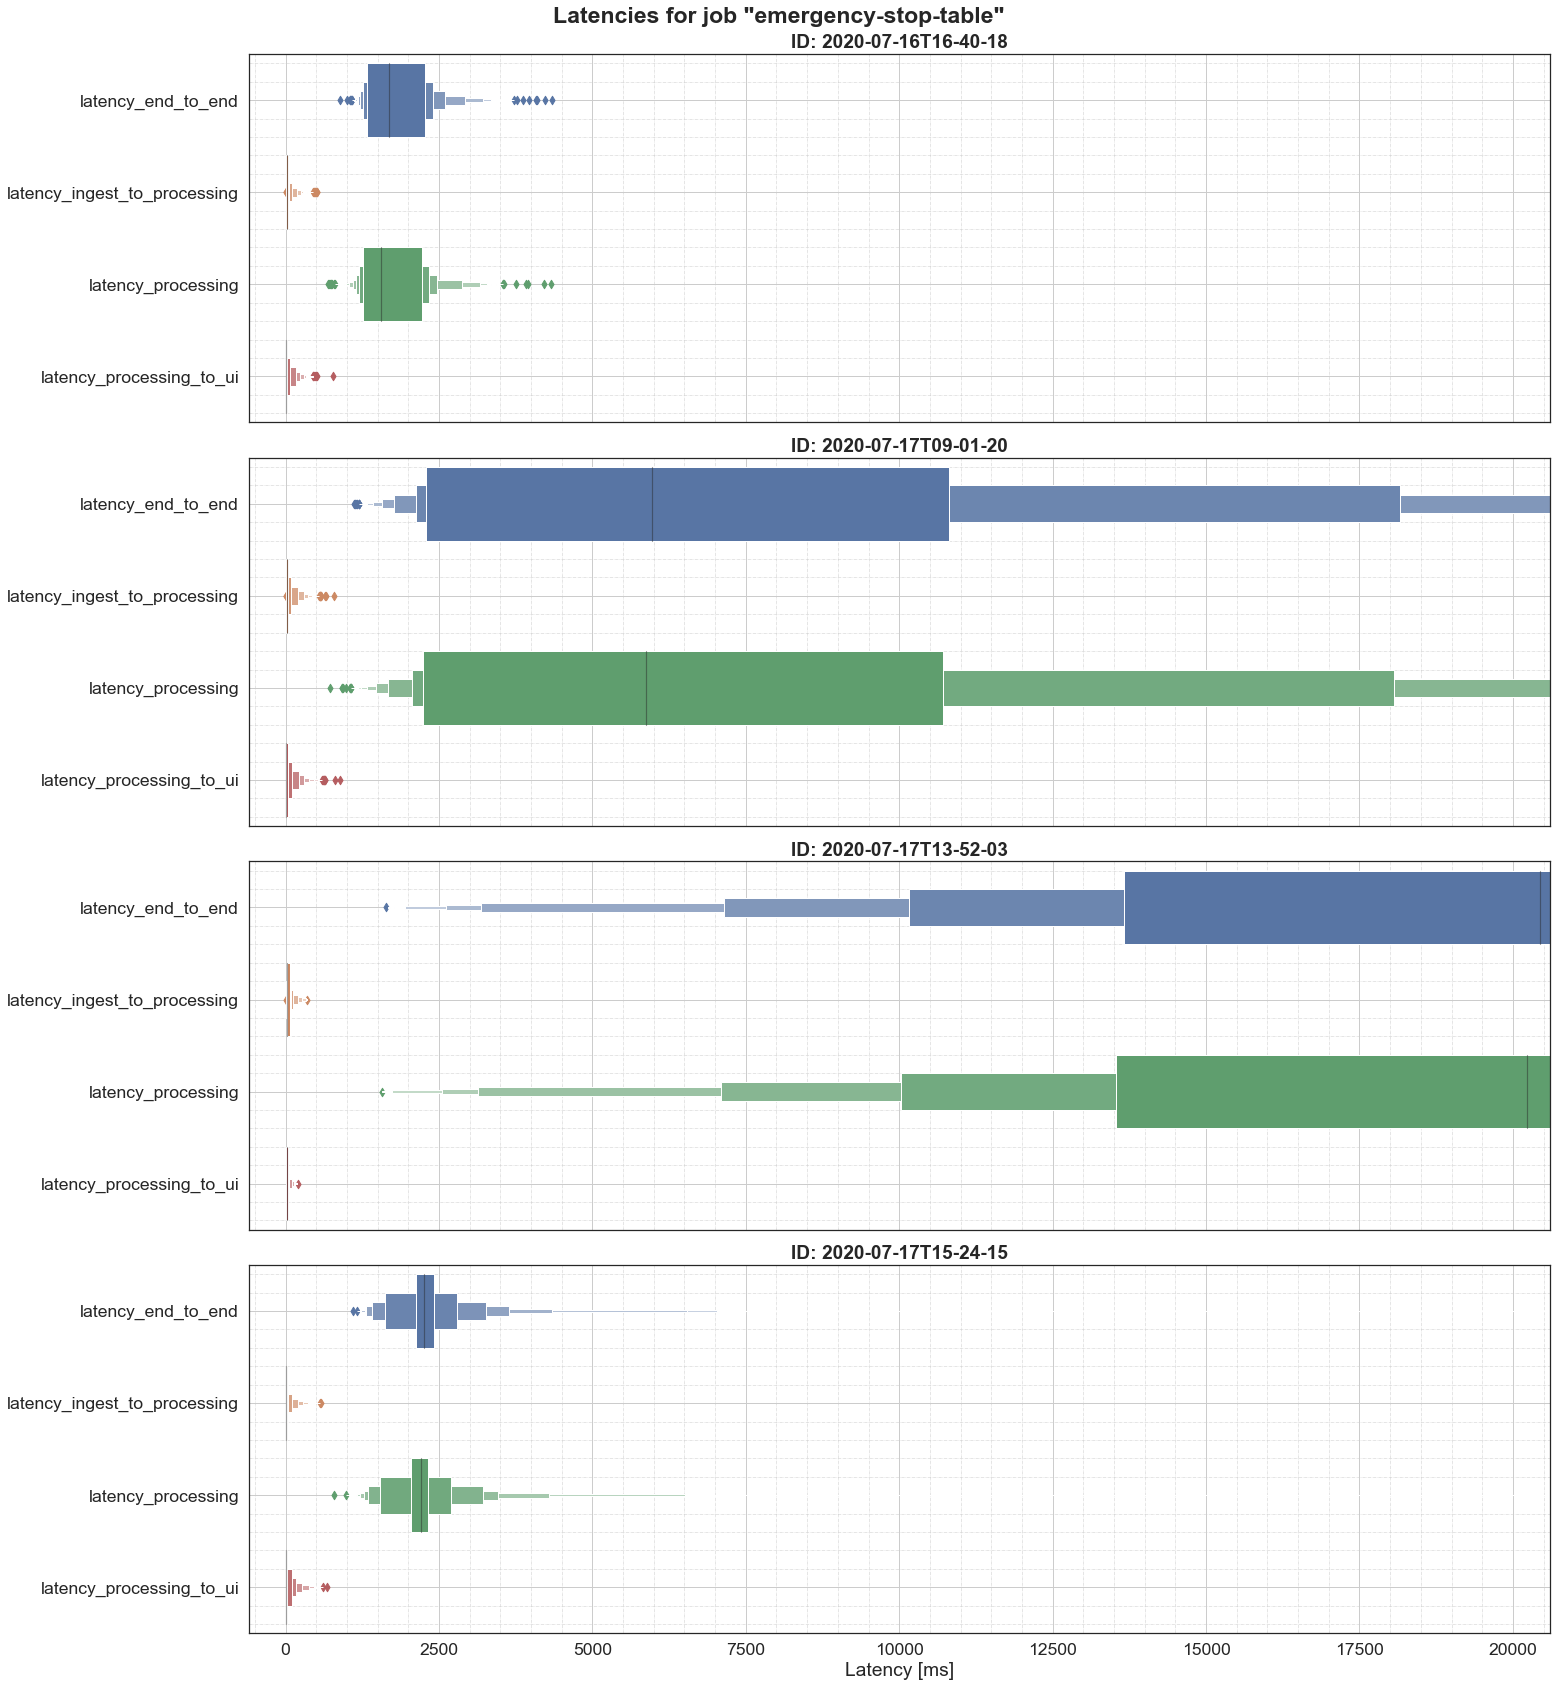

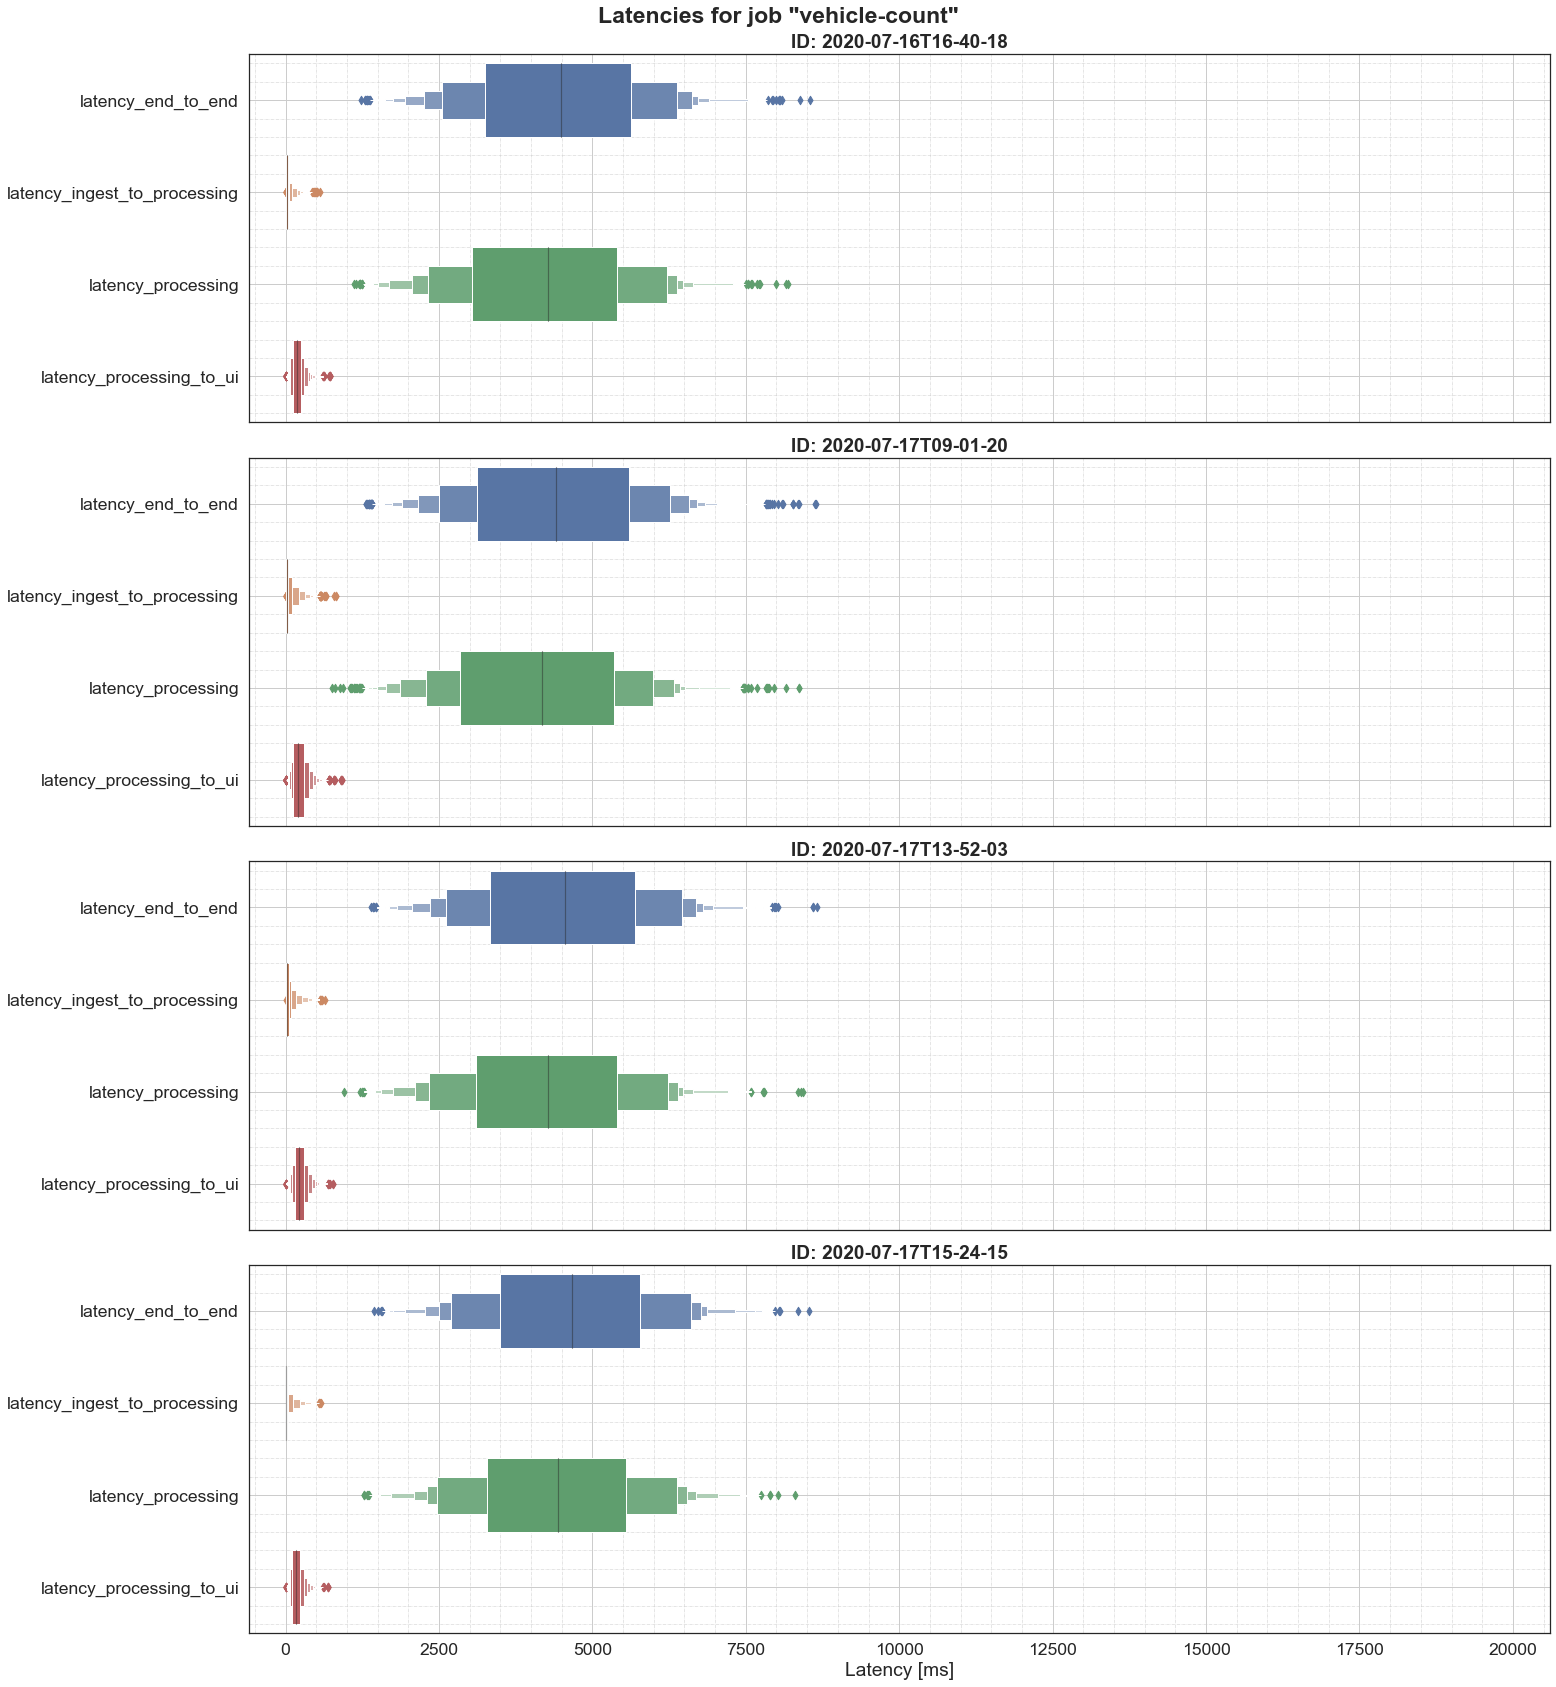

In [7]:
def plot_latency_distribution():
    latency_lim = min(20000, max_latency)
    for job in jobs:
        fig, axs = plt.subplots(n_data, 1, sharex=True, figsize=[22, 6*n_data])
        
        fig.suptitle(f"Latencies for job \"{job}\"")
        
        for i, (did, info) in enumerate(datas.items()):
            ax = axs[i]

            sb.boxenplot(data=select_job(info["data"], job)[latency_cols], orient="h", ax=ax)
            ax.set_xlim([-axislim_margin * latency_lim, latency_lim * (1 + axislim_margin)])
            ax.set_title(f"ID: {did}")
            if i+1 == len(jobs):
                ax.set_xlabel("Latency [ms]")
        
        plot_format(fig, space_factor=2)
        plot_save(f"latency_distribution_{job}")
    
plot_latency_distribution()

## Latency over time per job

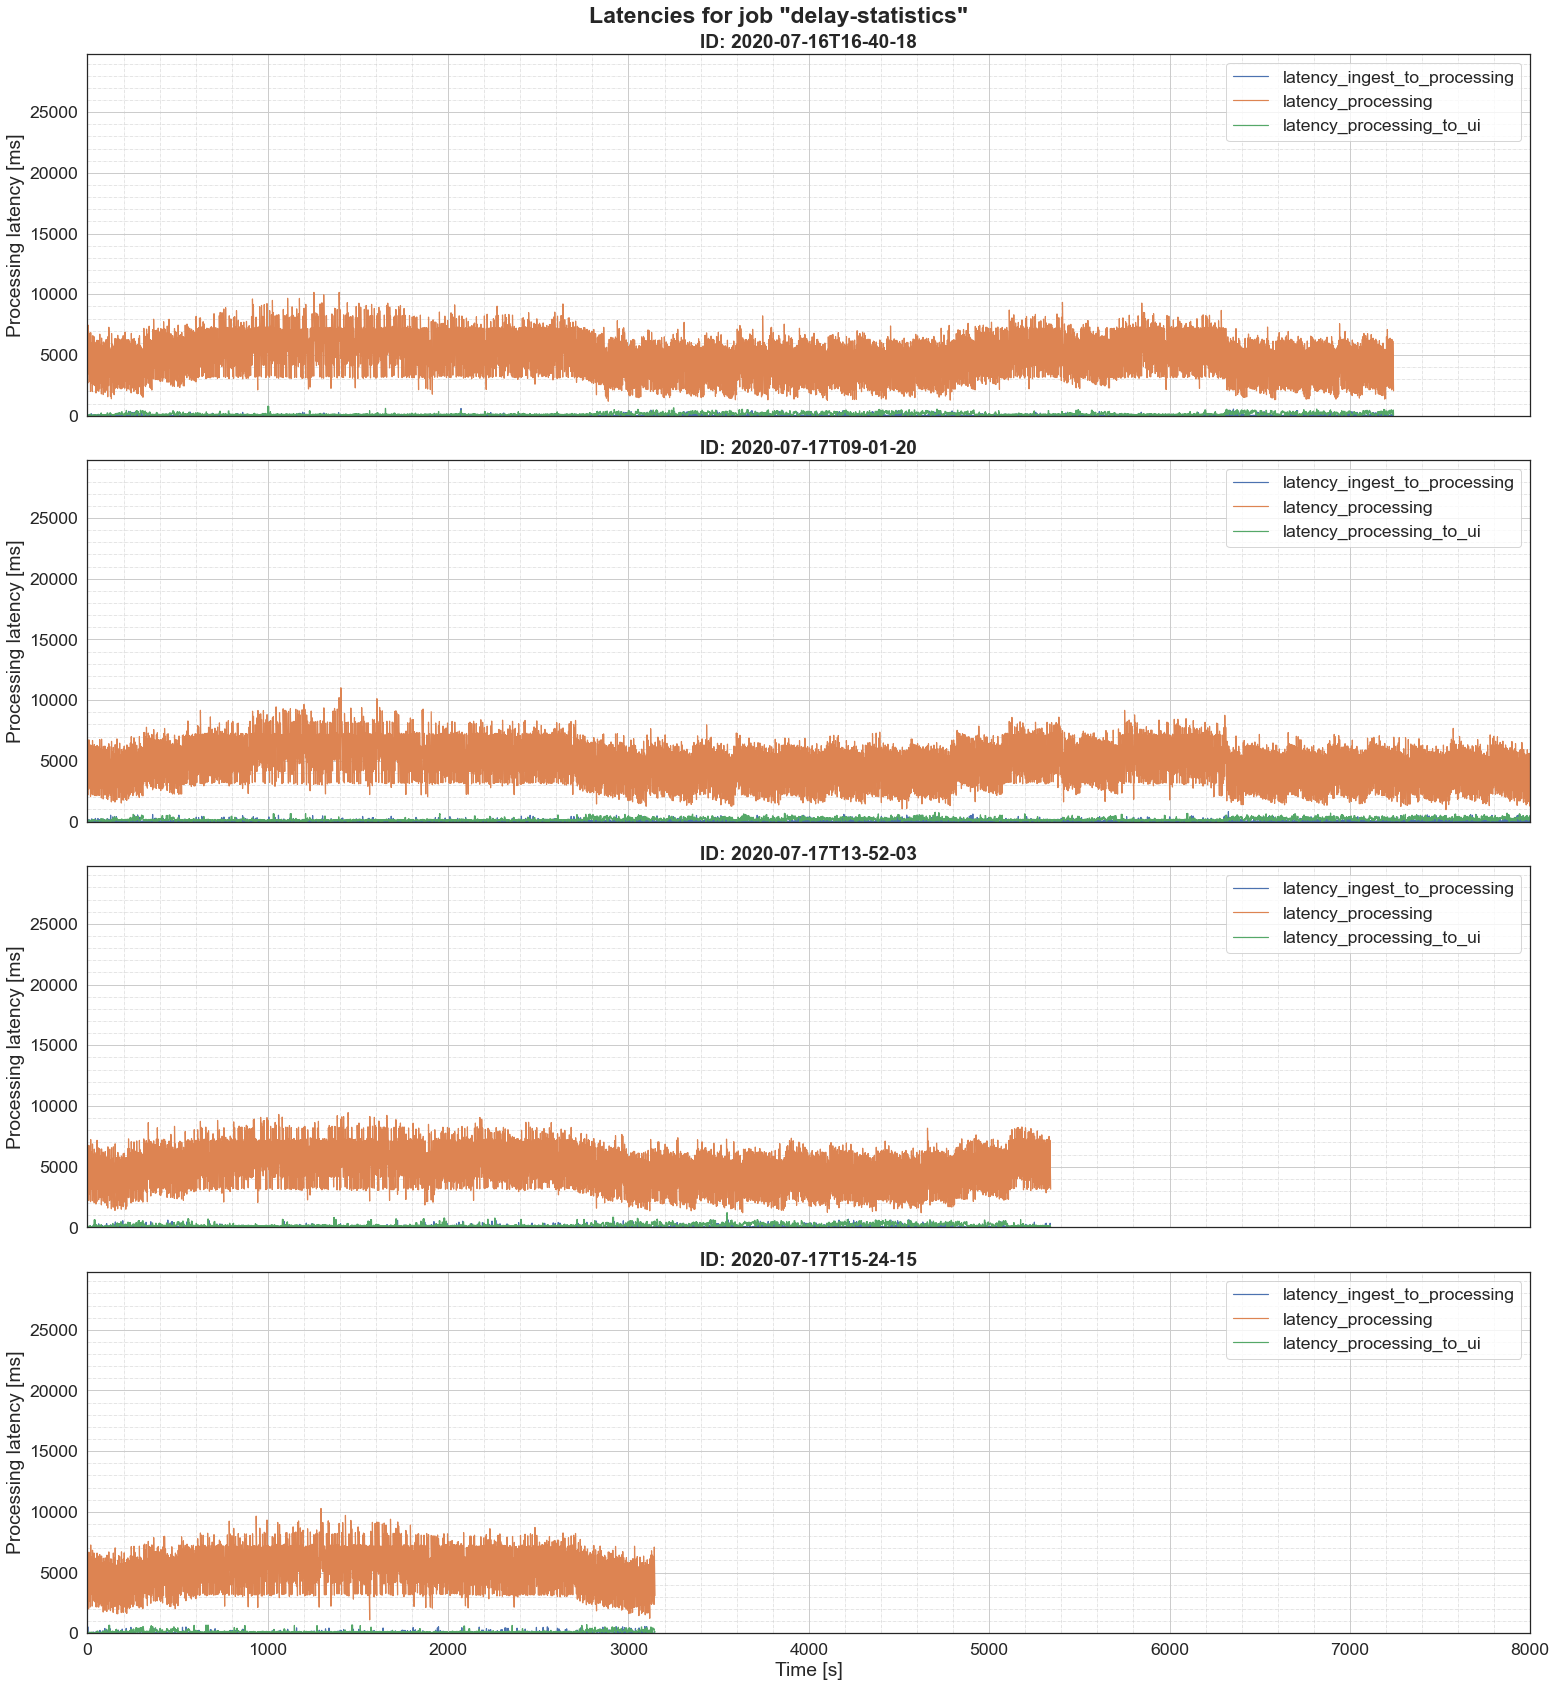

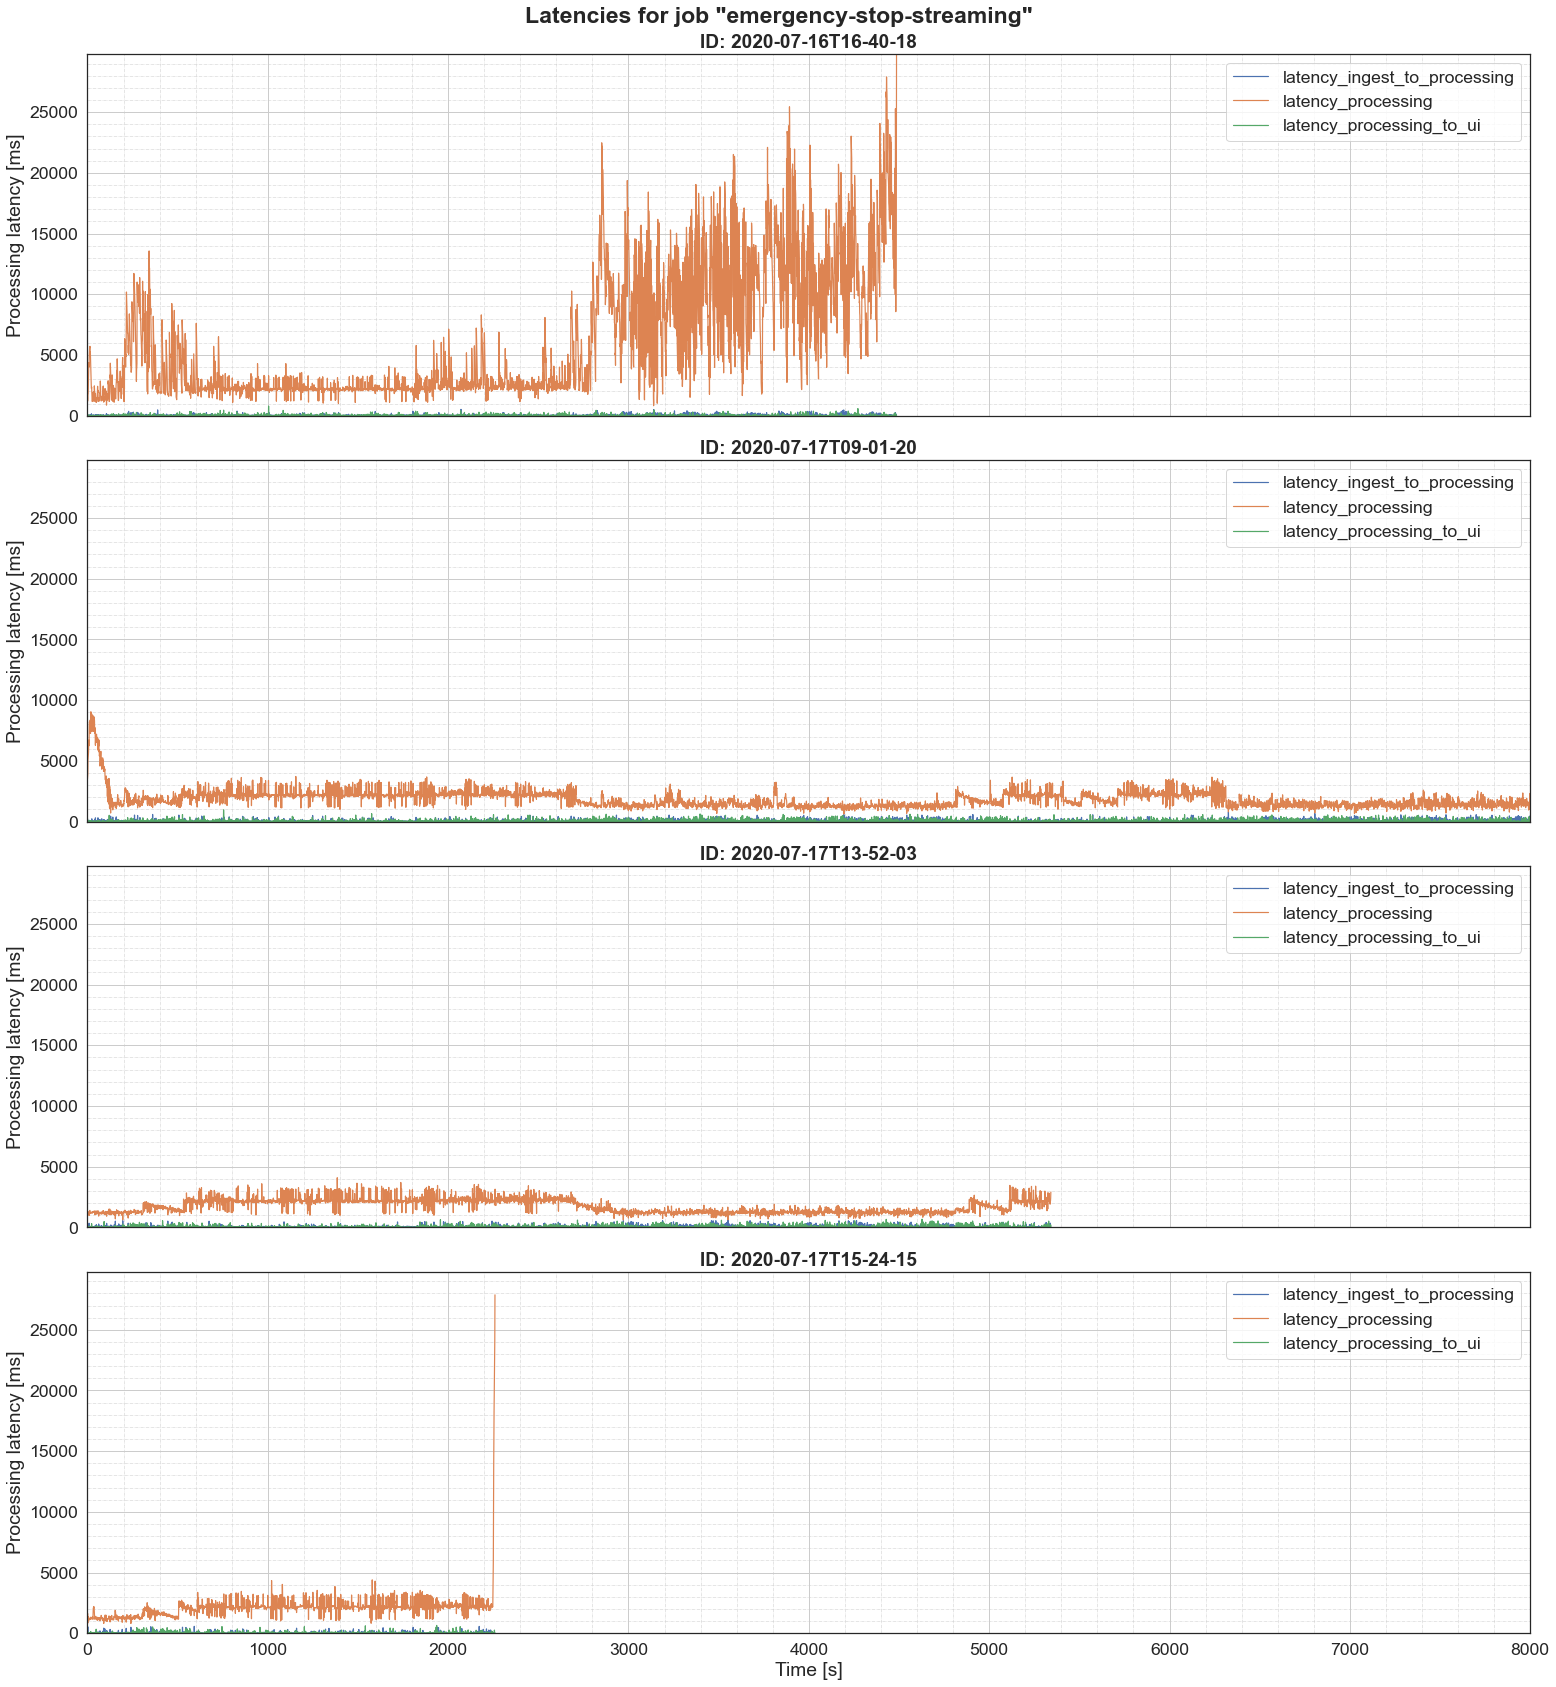

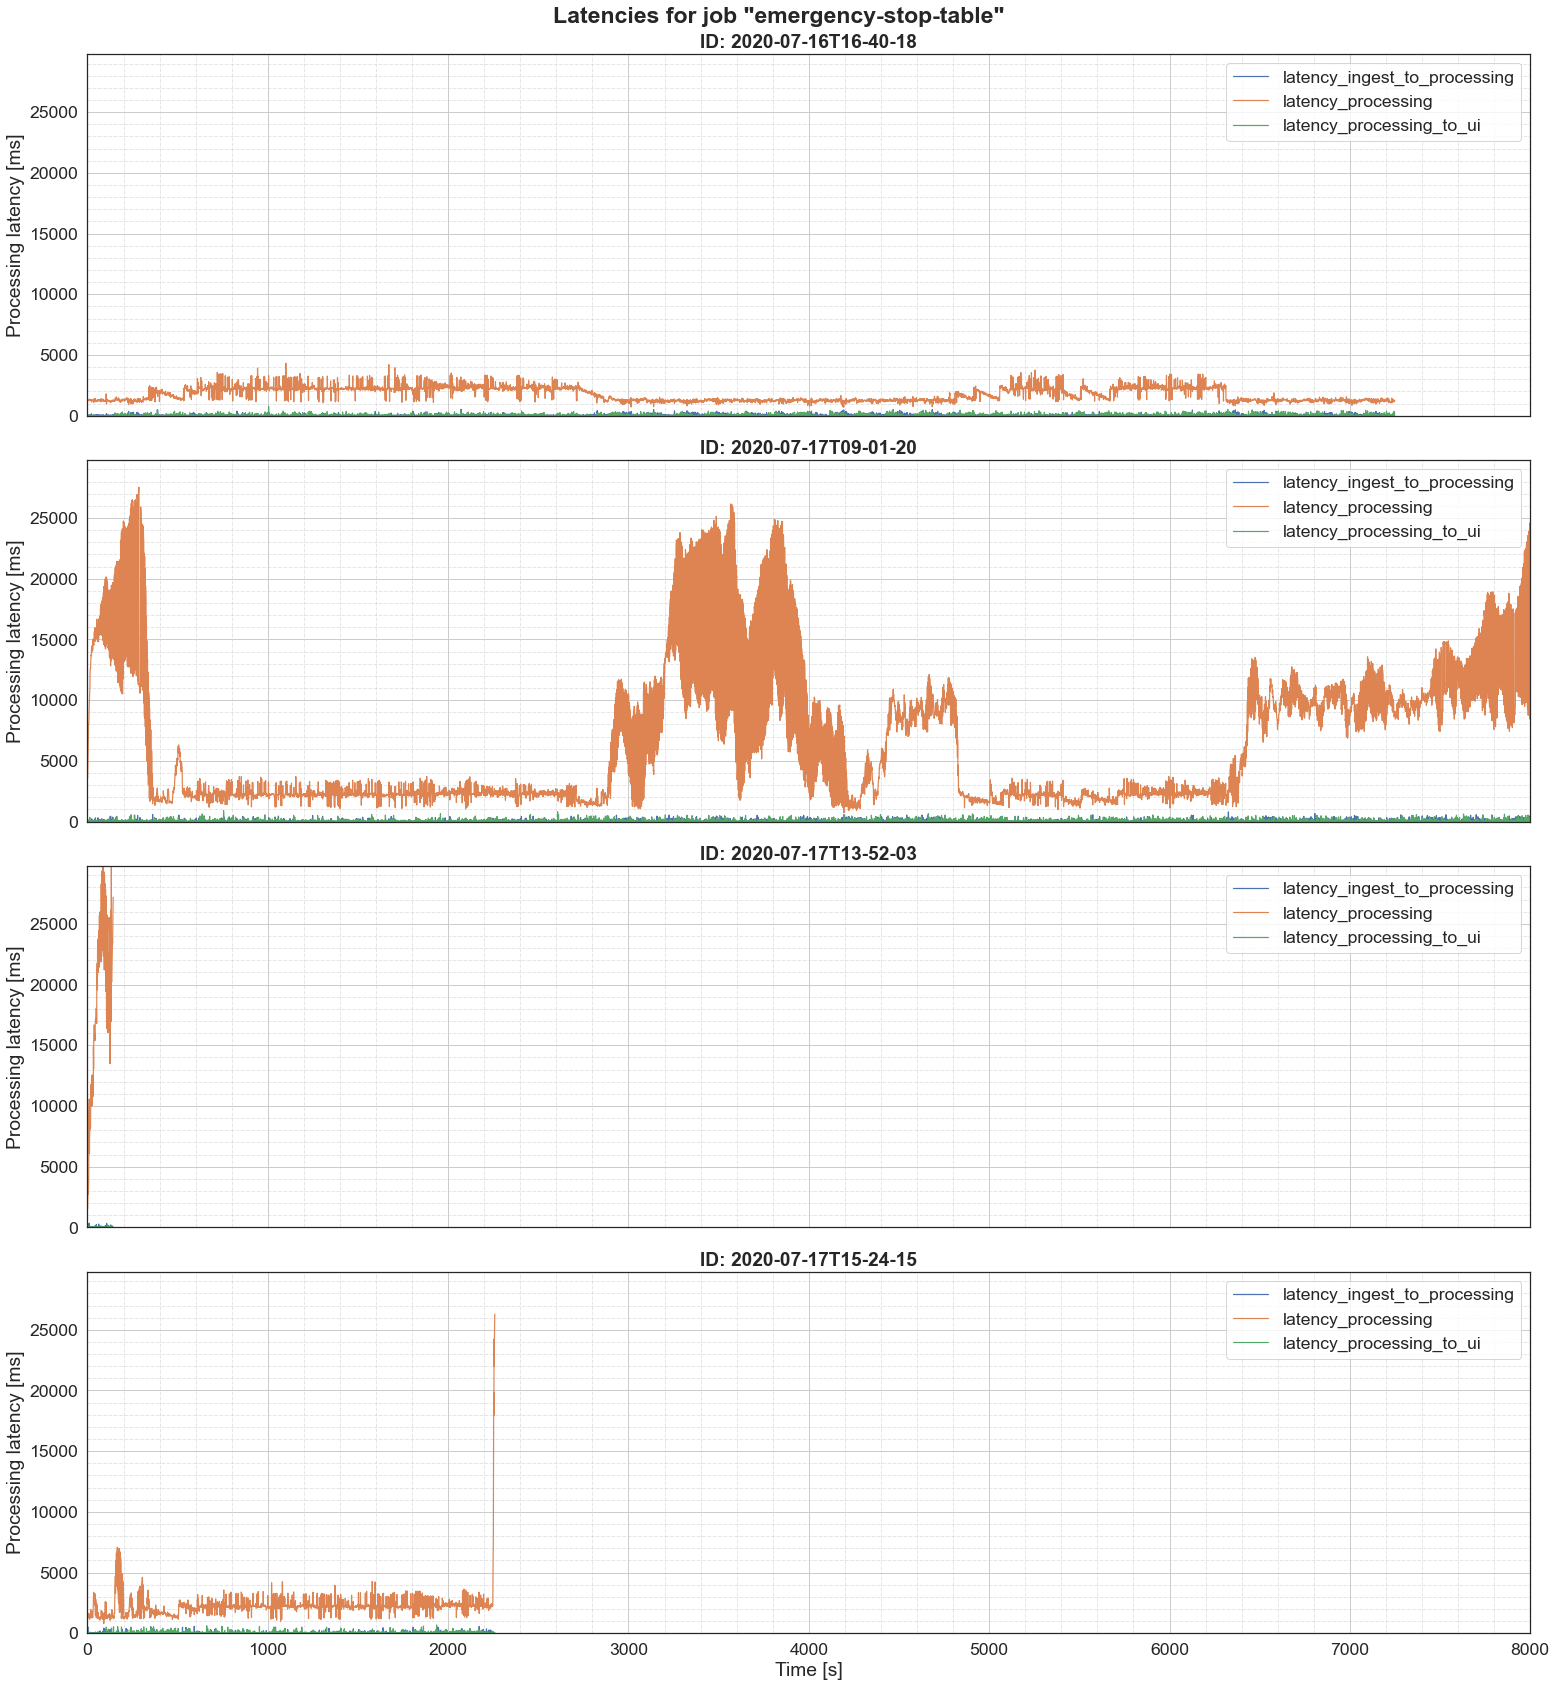

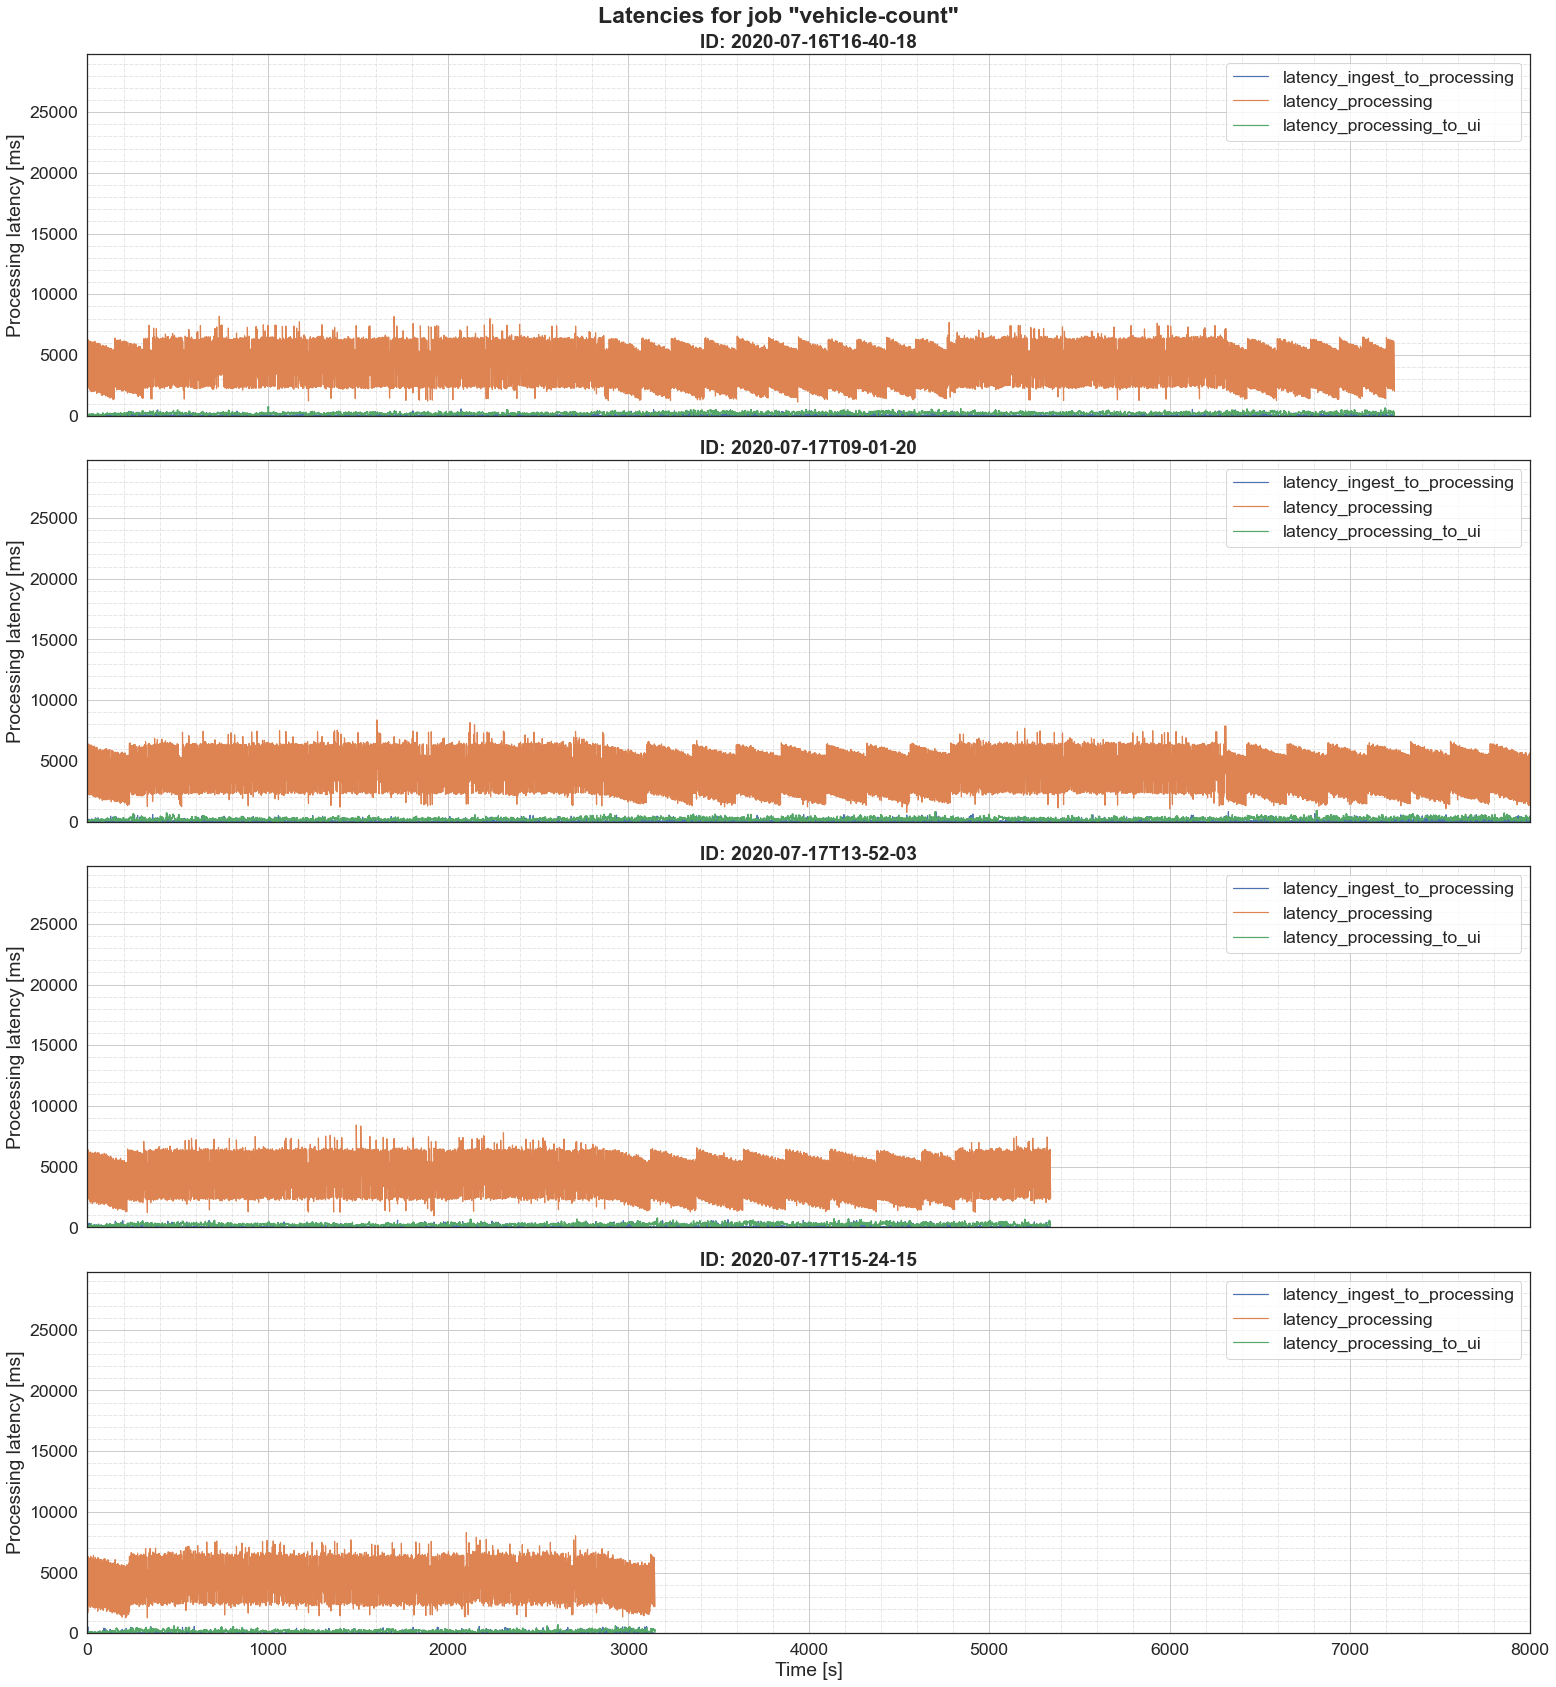

In [8]:
def plot_latency_over_time():
    latency_lim = min(30000, max_latency)
    for t_lim in [int(min(8000, max_t))]:
        for job in jobs:
            fig, axs = plt.subplots(n_data, 1, sharex=True, figsize=[22, 6*n_data])

            fig.suptitle(f"Latencies for job \"{job}\"")
            
            for i, (did, info) in enumerate(datas.items()):
                job_data = select_job(info["data"], job)
                ax = axs[i]

                for col in latency_cols_no_e2e:
                    ax.plot(job_data["t"], job_data[col], label=col)
                        
                ax.set_xlim([0, t_lim])
                ax.set_ylim([0, latency_lim])
                ax.set_ylabel("Processing latency [ms]")
                ax.set_title(f"ID: {did}")
                ax.legend()
                if i+1 == len(jobs):
                    ax.set_xlabel("Time [s]")

            plot_format(fig, space_factor=2)
            plot_save(f"latency_trend_{job}_t{max_t}")
    
plot_latency_over_time()

#### Observations
* Periodic pattern (e.g., vehicle-count between 3000 s and 5000 s) has different periods between runs. What could be the cause?
* Disabling checkpointing results in consistently low latencies for pattern detection
* General shape is similar between runs and does not seem to correlate with input volume